<h1 style="color: cyan; text-align: center; font-size: 250%; font-weight: bold;" >
            Feature Extraction </h1>
<table style="width: 90%; border-collapse: collapse;">
    <tr>
        <th style="color: magenta; text-align: left; font-size: 130%; font-weight: bold;" colspan="2">
        List of the Contents:
        </th>
    </tr>
    <tr style="color: deeppink">
        <th>Topic name</th>
        <th>About</th>
    </tr>
    <tr>
        <td style="color:teal; font-weight:bold" > 1) PCA</td>
        <td style="color:coral">
        <ul>
            <li>PCA is an unsupervised linear transformation technique, which is Primarily used for Dimensionality reduction, by "maximizing the variance of projected datapoints"</li>
            <li>1.1)PCA: Stepwise- Involve 5-Steps</li>
                <ul style="color: orange; font-weight:bold">
                    <li>Step1: Standardization</li>
                    <li>Step2: Covariance Matrix Computation</li>
                    <li>Step2: Covariance Matrix Computation</li>
                    <li>Step3: Eigen Decomposition i.e. Compute Eigenvalues and Eigenvectors</li>
                    <li>Step4: Selection of most imp Eigen vectors </li>
                    <li>Step5: Projection matrix creation of imp eigenvectors</li>
                    <li>Step6: Training/Test Data Transformation</li>
                </ul>
            <li>1.2)PCA: Using Scikit-learn</li>
                <ul style="color: orange; font-weight:bold">
                    <li> How to Find Optimal Number of PCs</li>
                <ul>
        </ul></td>
    </tr>
    <tr>
        <td style="color:teal; font-weight:bold" > 2) LDA </td>
        <td style="color:coral">---------</td>
    </tr>
    <tr>
        <td style="color:teal; font-weight:bold" > 3) t-SNE </td>
        <td style="color:coral">---------</td>
    </tr>
</table>

<h2 style="color:gold; text-align:left; font-size:200%; font-weight:bold;">
1.1) PCA: Implementation stepwise</h2>

covariance matrix:
 [[ 1.02083333 -0.1255192  -0.13999713]
 [-0.1255192   1.02083333  0.2707831 ]
 [-0.13999713  0.2707831   1.02083333]]
eigen values: 
 [1.38773326 0.92522462 0.74954212]
eigen_vectors 
 [[ 0.4556872  -0.88875899  0.04956435]
 [-0.6242298  -0.35875972 -0.69399468]
 [-0.63457571 -0.28530495  0.71827206]]


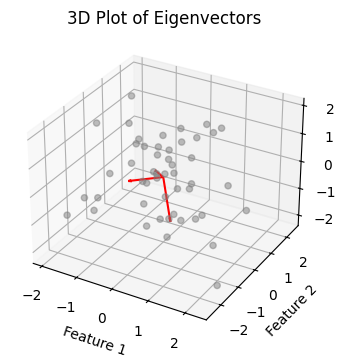

Top two Principle components 
 [[ 0.4556872  -0.88875899  0.04956435]
 [-0.6242298  -0.35875972 -0.69399468]]
         PC1       PC2  Target
1  -2.068197 -1.354776       1
2   1.539959  0.058385       1
17  0.929000  0.521753       1


In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

df=pd.read_csv('pca_dataset.csv')
df.sample(3)
#Lets plot the data to check th
import plotly.express as px 
fig=px.scatter_3d(df, x=df['Feature1'], y=df['Feature2'], z=df['Feature3'], 
                  color=df['Target'].astype('str'), )
fig.update_traces(marker=dict(size=6, line=dict(width=2, color='DarkSlateGrey')), 
                 selector=dict(mode='markers'))
fig.update_layout( width=400,  height=350)
fig.show()
#STEP-1: Standardisation 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:, 0:3]=scaler.fit_transform(df.iloc[:, 0:3])

#STEP-2: COVARIANCE MATRIX CONSTRUCTION 
        #np.cov() Function np.cov() function expects the following format:
        #Rows should represent variables (features).
        #Columns should represent observations (data points)
        #df.iloc[:, 0:3].T   #check this 
covariance_matrix=np.cov(df.iloc[:, 0:3].T)
print('covariance matrix:\n', covariance_matrix)

#STEP-3: Eigen vectors and Eigen value calculation 
eigen_values, eigen_vectors=np.linalg.eig(covariance_matrix)
print('eigen values: \n', eigen_values)
print('eigen_vectors \n', eigen_vectors)


# Plotting the Eigenvectors
origin = [0, 0, 0]  # Origin point for the arrows
# Set up 3D plot
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')
# Scatter plotof the original data
ax.scatter(df['Feature1'], df['Feature2'], df['Feature3'], marker='o', color='gray', alpha=0.5)

# Plot the eigenvectors as arrows
for i in range(len(eigen_vectors)):
    ax.quiver(*origin, eigen_vectors[0, i], eigen_vectors[1, i], eigen_vectors[2, i], 
              length=eigen_values[i], color='r', arrow_length_ratio=0.1)

# Set labels for the plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title("3D Plot of Eigenvectors")
plt.show()

#STEP-4: SELECTION OF TOP EIGEN VECTORS 
pc=eigen_vectors[0:2]
print('Top two Principle components \n', pc)

#STEP-5: Projection matrix creation using transformation
projection_matrix=np.dot(df.iloc[:, 0:3], pc.T) 
new_df=pd.DataFrame(projection_matrix, columns=['PC1', 'PC2'])
new_df['Target']=df['Target'].values
print(new_df.sample(3))

#ploting the datapoints 
fig = px.scatter(x=new_df['PC1'],y=new_df['PC2'],
                 color=new_df['Target'].astype('str'),
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout( width=400,  height=350)
fig.show()

<h2 style="color:gold; text-align:left; font-size:200%; font-weight:bold;">
1.2) PCA: Using Sckit-learn</h2>

In [32]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
 
#Data ingestion 
df=pd.read_csv('mnist_train.csv')
df.sample(2)
#cheking the image digit 
import matplotlib.pyplot as plt 
# plt.imshow(df.iloc[4, 1:].values.reshape(28, 28))

#Train-Test Split 
x=df.iloc[:, 1:]
y=df.iloc[:, 0]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

#WITHOUT PCA- MODEL ACCURACY  
#Training the model 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
#Calculating accuracy 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print('KNN accuracy without:', accuracy)

#USING PCA: MODEL ACCURACY 
#1)Step: Standardrization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_trf=scaler.fit_transform(x_train)
x_test_trf=scaler.transform(x_test)

#2)Step:apply PCA-this will create EVs and EVc
        #---> Attribute to check E-Vectors=pca.components_
        #---> Attribute to check E-values=pca.explained_variance_ 
from sklearn.decomposition import PCA
pca=PCA(n_components=100) 
#now fit the pca: by doing this-it will shift x_train & x_test into trf cordinate
x_train_trf=pca.fit_transform(x_train_trf)
x_test_trf=pca.transform(x_test_trf)

#Model traing with trf data 
knn=KNeighborsClassifier()
knn.fit(x_train_trf, y_train)
y_pred_trf=knn.predict(x_test_trf)
#calculate accuracy of model 
accuracy_trf= accuracy_score(y_test, y_pred_trf)
print("KNN accuracy WITH PCA:",accuracy_trf)


KNN accuracy without: 0.9648809523809524
KNN accuracy WITH PCA: 0.955


<h2 style="color:gold; text-align:left; font-size:200%; font-weight:bold;">
Finding optimum Nos of PCs</h2>

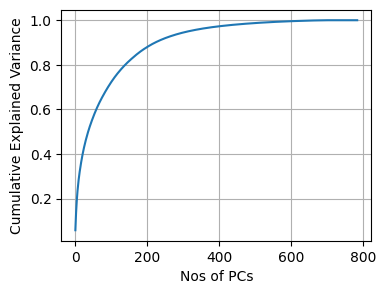

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df=pd.read_csv('mnist_train.csv')
#Train-Test Split 
x=df.iloc[:, 1:]
y=df.iloc[:, 0]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

#1)Step: Standardrization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_trf=scaler.fit_transform(x_train)
x_test_trf=scaler.transform(x_test)

#2)Step:apply PCA-this will create EVs and EVc
from sklearn.decomposition import PCA
pca=PCA() 
x_train_trf=pca.fit_transform(x_train_trf)
x_test_trf=pca.transform(x_test_trf)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(4,3))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Nos of PCs')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
